# Per Pixel Augmentation Exploration

In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.


In [2]:
from training.utils import *

c:\program files\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
from glob import glob
import argparse
import csv
import errno
import json
import os
import time

from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing import image
#import rasterio


In [4]:
# Define location for dataset
training_filepath = "D:/Berkeley/BigEarthNet-S2-v1.0/tfrecords_1_percent/train.tfrecord"

In [5]:
training_dataset = get_dataset(training_filepath, batch_size=4)

In [6]:
batch_generator = iter(training_dataset)
img_batch = batch_generator.get_next()[0]

(array([ 5904.,  5685., 29004., 43573., 33814., 16015.,  5357.,  2609.,
         1306.,   733.]),
 array([-1.558497  , -0.987865  , -0.417233  ,  0.15339899,  0.724031  ,
         1.294663  ,  1.8652949 ,  2.435927  ,  3.006559  ,  3.5771909 ,
         4.147823  ], dtype=float32),
 <a list of 10 Patch objects>)

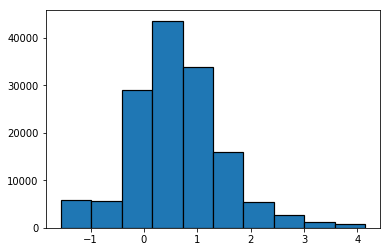

In [23]:
plt.hist(tf.reshape(img_batch[0,:,:,:],(144000)), edgecolor='black', linewidth=1.2)

Brightness shifts the values left or right (addition operation).

In [20]:
bright_batch = tf.image.adjust_brightness(img_batch,  delta=1)

(array([ 5904.,  5685., 29004., 43573., 33814., 16015.,  5357.,  2609.,
         1306.,   733.]),
 array([-0.55849695,  0.01213503,  0.582767  ,  1.153399  ,  1.724031  ,
         2.294663  ,  2.865295  ,  3.435927  ,  4.006559  ,  4.577191  ,
         5.147823  ], dtype=float32),
 <a list of 10 Patch objects>)

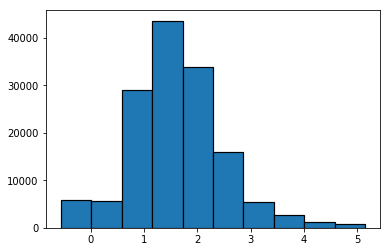

In [24]:
plt.hist(tf.reshape(bright_batch[0,:,:,:],(144000)), edgecolor='black', linewidth=1.2)

Contrast is applied to each channel individually: (x - mean) * contrast_factor + mean.

In [10]:
contrast_batch = tf.image.adjust_contrast(img_batch, 0.5)

(array([ 4902., 10802., 33152., 45050., 31883.,  9731.,  4054.,  2066.,
         1533.,   827.]),
 array([-0.53179824, -0.21371196,  0.10437431,  0.4224606 ,  0.7405469 ,
         1.0586331 ,  1.3767195 ,  1.6948057 ,  2.012892  ,  2.3309782 ,
         2.6490645 ], dtype=float32),
 <a list of 10 Patch objects>)

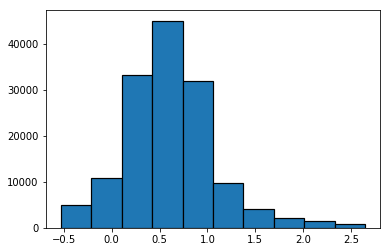

In [25]:
plt.hist(tf.reshape(contrast_batch[0,:,:,:],(144000)), edgecolor='black', linewidth=1.2)

Gamma operation, which is not symmetric about the mean: Out = gain * In^gamma

In [13]:
gain_batch = tf.image.adjust_gamma(img_batch, gamma=1, gain=0.5)

(array([ 5904.,  5685., 29004., 43573., 33814., 16015.,  5357.,  2609.,
         1306.,   733.]),
 array([-0.7792485 , -0.4939325 , -0.2086165 ,  0.0766995 ,  0.3620155 ,
         0.6473315 ,  0.93264747,  1.2179635 ,  1.5032794 ,  1.7885954 ,
         2.0739114 ], dtype=float32),
 <a list of 10 Patch objects>)

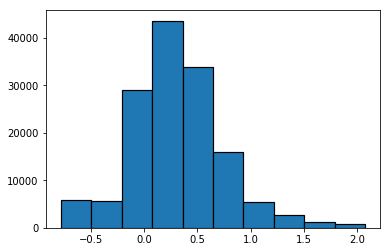

In [27]:
plt.hist(tf.reshape(gain_batch[0,:,:,:],(144000)), edgecolor='black', linewidth=1.2)

## Gamma Exploration

Example of Gamma operations on an RGB channel image
![alt text](https://www.pyimagesearch.com/wp-content/uploads/2015/09/gamma_correction_example.jpg "Example Gamma correction on RGB image")

In [33]:
import numpy as np
from matplotlib import pyplot as plt

# from Tensorflow code for image.adjust_gamma
# gain * flt_image**gamma
gain = 1
gamma = 2.2
values = np.arange(-2.,2,0.01)

In [34]:
def plot_values(g,identity, r=2) :
    plt.figure(figsize=(8,8))
    plt.plot(identity,identity)
    plt.plot(identity,g)
    plt.axis('equal')
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.grid()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


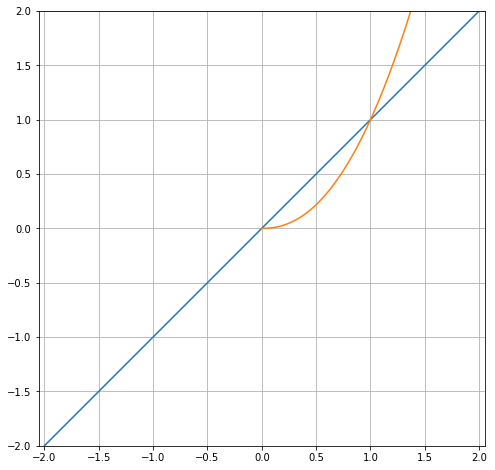

In [35]:
#without correction for negative values
gain_values = gain * np.array(values)**gamma
plot_values(gain_values, values)


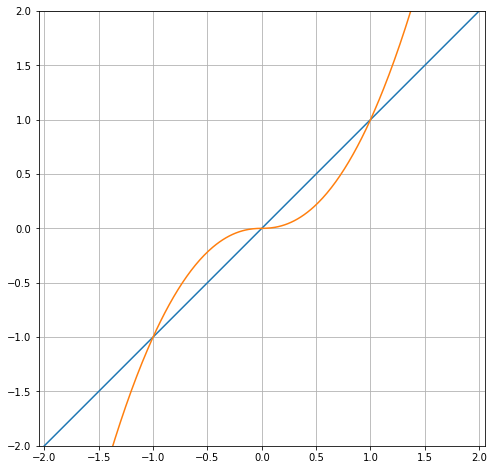

In [36]:
#with correction for negative values
gained_values = gain * (np.sign(values) * np.abs(values)**gamma)
plot_values(gained_values, values)
